# **Normalization**


_Normalization is a technique often applied as part of data preparation for ML._

_The goal of Normalization is to change the values of numeric column in the dataset to use a common scale, without distorting differences i the ranges of values or losing information._


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../files/Social_Network_Ads.csv", usecols=[2,3,4])

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Train Test**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("Purchased", axis=1),
    data["Purchased"],
    test_size=0.2,
    random_state=10,
)

**MinMaxScaling**


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# here X_train_scaled and X_test_scaled are not dataframes, they are numpy arrays

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
X_test_scaled.min(), X_test_scaled.max()

# since the min values are 0 and max values are 1, we have successfully implemented MinMaxScaler

(Age                0.047619
 EstimatedSalary    0.000000
 dtype: float64,
 Age                0.97619
 EstimatedSalary    0.97037
 dtype: float64)

**Effects of Scaling**

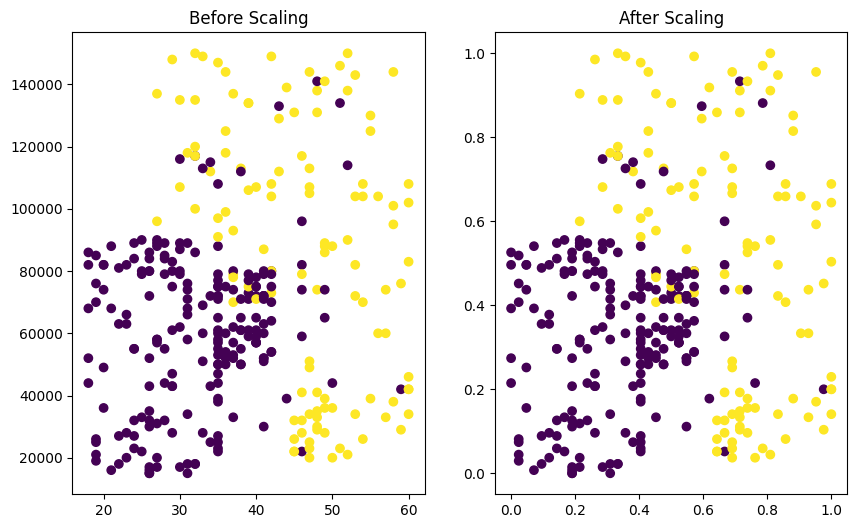

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax1.set_title("Before Scaling")
ax1.scatter(X_train["Age"], X_train["EstimatedSalary"],c=y_train)
ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], c= y_train)

plt.show()

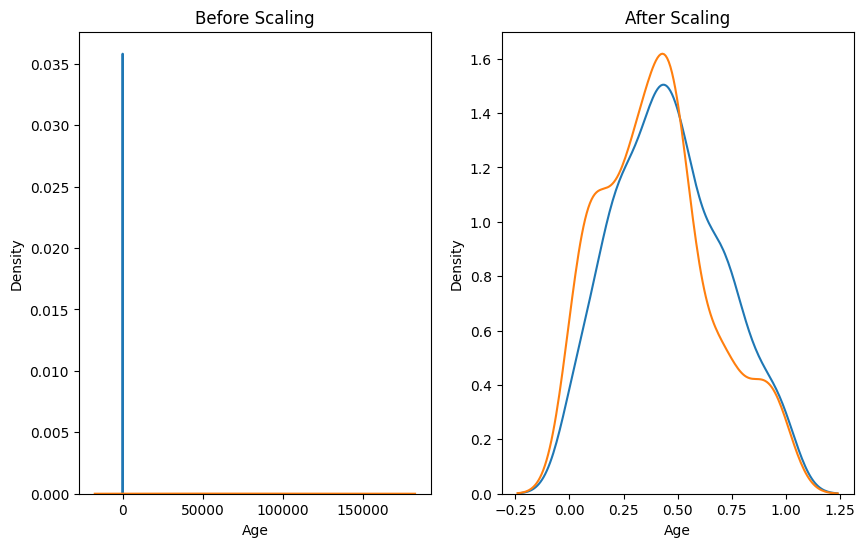

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr_scaled = LogisticRegression()

In [13]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# acc = accuracy_score(y_test, y_pred)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [17]:
# print(f"Accuracy without Scaling:{acc}")
print(f"Accuracy with Scaling:{acc_scaled}")

Accuracy with Scaling:0.8875
